In [1]:
import numpy as np
import scipy
import sklearn
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'Greys'

import seaborn as sns

import sys,os,pdb,copy,pickle
from importlib import reload
# import pynapple as nap

sys.path.append('/mnt/home/szheng/projects/seq_detection2/code')
sys.path.append('/mnt/home/szheng/projects/util_code')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis/scripts')
sys.path.append('/mnt/home/szheng/projects/cluster_spikes')
sys.path.append('/mnt/home/szheng/projects/place_variability/code')
import data_prep_new as dpn
import place_cell_analysis as pa
import plot_helper as ph
import preprocess as prep
import nmf_analysis as na
import nmf_plot as nmfp
reload(na)

import raster_new as rn
import data_prep_pyn as dpp


import change_point_analysis as cpa
import change_point_plot as cpp

import place_field_analysis as pf

import switch_analysis_one_session as saos
reload(saos)

import process_central_arm as pca 
import change_point_analysis_central_arm_seperate as cpacas

import misc
reload(misc)
from misc import get_nth_key, get_nth_val

67 sessions!
67 sessions!


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
import matplotlib
matplotlib.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.size'] = 10

In [3]:
figdir = '/mnt/home/szheng/ceph/place_variability/fig/paper/figure_cosw'
misc.get_or_create_subdir(figdir)
data_dir = '/mnt/home/szheng/ceph/place_variability/data/paper'
misc.get_or_create_subdir(data_dir)

'/mnt/home/szheng/ceph/place_variability/data/paper'

In [4]:
import database
db = database.db

subdb = db.query('owner=="roman"').sort_values('n_pyr_putative',ascending=False).iloc[:1000]
subdb = subdb.query('ntrials>=20&n_neurons>=50')
to_exclude_sess = ['e16_3m2_211211']
subdb=subdb.loc[~subdb['sess_name'].isin(to_exclude_sess)]


import pf_recombine_central as pfrc
import fr_map_one_session as fmos
import switch_detection_one_session as sdos
reload(sdos)
import get_all_switch_add_metrics as gasam
reload(gasam)

import preprocess_one_session as prepos

In [5]:
fn = 'prepped_data_agg.p'
fn_full = os.path.join(data_dir,fn)
prepped_data_agg = pickle.load(open(fn_full,'rb'))

all_fields_recombined_all = prepped_data_agg['all_fields_recombined_all']
pf_params_recombined_all=  prepped_data_agg['pf_params_recombined_all']
fr_map_trial_df_all= prepped_data_agg['fr_map_trial_df_all']
pval_all = prepped_data_agg['pval_all']
X_pwc_all = prepped_data_agg['X_pwc_all']
X_raw_all = prepped_data_agg['X_raw_all']
changes_df_all = prepped_data_agg['changes_df_all']
var_res_all = prepped_data_agg['var_res_all']
corr_all = prepped_data_agg['corr_all']
all_sw_d_all = prepped_data_agg['all_sw_d_all']
all_sw_with_metrics_d_all = prepped_data_agg['all_sw_with_metrics_d_all']
best_n_all = prepped_data_agg['best_n_all']
spk_beh_df_all = prepped_data_agg['spk_beh_df_all']
trial_index_to_index_within_df_all=prepped_data_agg['trial_index_to_index_within_df_all']

ntrials_per_tt=fr_map_trial_df_all.groupby(level=(0,1,2,3)).apply(lambda x:x.dropna(axis=1,how='all').shape[1])

ntrials_mask = ntrials_per_tt.groupby(level=(0,1,2)).apply(lambda x:(x>=7).all()) 

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [177]:
subdb

data_dir_full  \
animal_name                                                        
e13_26m1    0  /mnt/home/szheng/ceph/ad/roman_data/e13/e13_26...   
e15_13f1    0  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_13...   
            1  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_13...   
            2  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_13...   
            3  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_13...   
e13_26m1    1  /mnt/home/szheng/ceph/ad/roman_data/e13/e13_26...   
e13_16f1    7  /mnt/home/szheng/ceph/ad/roman_data/e13/e13_16...   
e13_26m1    2  /mnt/home/szheng/ceph/ad/roman_data/e13/e13_26...   
e16_3m2     3  /mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m...   
            2  /mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m...   
e16_3m1     3  /mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m...   
e16_3m2     0  /mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m...   
e13_26m1    3  /mnt/home/szheng/ceph/ad/roman_data/e13/e13_26...   
            4  /mnt/home/szheng/ceph/ad/roman_data/e13/e13_26...   
e16_3m1     2  /mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m...   
e13_16f1    8  /mnt/home/szheng/ceph/ad/roman_data/e13/e13_16...   
e16_3m1     1  /mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m...   
e13_16f1    0  /mnt/home/szheng/ceph/ad/roman_data/e13/e13_16...   
            4  /mnt/home/szheng/ceph/ad/roman_data/e13/e13_16...   
            1  /mnt/home/szheng/ceph/ad/roman_data/e13/e13_16...   
e15_10m1    5  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_10...   
e13_16f1    2  /mnt/home/szheng/ceph/ad/roman_data/e13/e13_16...   
e15_10m1    6  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_10...   
e14_2m2     2  /mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m...   
e15_9f1     4  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f...   
e13_16f1    5  /mnt/home/szheng/ceph/ad/roman_data/e13/e13_16...   
            6  /mnt/home/szheng/ceph/ad/roman_data/e13/e13_16...   
e15_10m1    3  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_10...   
e14_2m2     1  /mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m...   
e16_1f1     9  /mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f...   
e15_9f1     3  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f...   
e16_1f1     5  /mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f...   
e14_2m3     4  /mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m...   
            5  /mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m...   
            7  /mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m...   
            6  /mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m...   
e16_1f1     4  /mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f...   
            3  /mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f...   
e15_9f1     5  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f...   
e16_1f1     6  /mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f...   
e15_9f1     2  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f...   
e16_2m1     2  /mnt/home/szheng/ceph/ad/roman_data/e16/e16_2m...   
e15_10m1    4  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_10...   
e15_9f1     0  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f...   
e14_2m3     3  /mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m...   
            2  /mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m...   

                     sess_name animal_name.1        date  \
animal_name                                                
e13_26m1    0  e13_26m1_210913      e13_26m1  2021-09-13   
e15_13f1    0  e15_13f1_220117      e15_13f1  2022-01-17   
            1  e15_13f1_220118      e15_13f1  2022-01-18   
            2  e15_13f1_220119      e15_13f1  2022-01-19   
            3  e15_13f1_220120      e15_13f1  2022-01-20   
e13_26m1    1  e13_26m1_211019      e13_26m1  2021-10-19   
e13_16f1    7  e13_16f1_210328      e13_16f1  2021-03-28   
e13_26m1    2  e13_26m1_211116      e13_26m1  2021-11-16   
e16_3m2     3   e16_3m2_211213       e16_3m2  2021-12-13   
            2   e16_3m2_211212       e16_3m2  2021-12-12   
e16_3m1     3   e16_3m1_210203       e16_3m1  2021-02-03   
e16_3m

In [195]:
subdb

data_dir_full  \
animal_name                                                        
e13_26m1    0  /mnt/home/szheng/ceph/ad/roman_data/e13/e13_26...   
e15_13f1    0  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_13...   
            1  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_13...   
            2  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_13...   
            3  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_13...   
e13_26m1    1  /mnt/home/szheng/ceph/ad/roman_data/e13/e13_26...   
e13_16f1    7  /mnt/home/szheng/ceph/ad/roman_data/e13/e13_16...   
e13_26m1    2  /mnt/home/szheng/ceph/ad/roman_data/e13/e13_26...   
e16_3m2     3  /mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m...   
            2  /mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m...   
e16_3m1     3  /mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m...   
e16_3m2     0  /mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m...   
e13_26m1    3  /mnt/home/szheng/ceph/ad/roman_data/e13/e13_26...   
            4  /mnt/home/szheng/ceph/ad/roman_data/e13/e13_26...   
e16_3m1     2  /mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m...   
e13_16f1    8  /mnt/home/szheng/ceph/ad/roman_data/e13/e13_16...   
e16_3m1     1  /mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m...   
e13_16f1    0  /mnt/home/szheng/ceph/ad/roman_data/e13/e13_16...   
            4  /mnt/home/szheng/ceph/ad/roman_data/e13/e13_16...   
            1  /mnt/home/szheng/ceph/ad/roman_data/e13/e13_16...   
e15_10m1    5  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_10...   
e13_16f1    2  /mnt/home/szheng/ceph/ad/roman_data/e13/e13_16...   
e15_10m1    6  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_10...   
e14_2m2     2  /mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m...   
e15_9f1     4  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f...   
e13_16f1    5  /mnt/home/szheng/ceph/ad/roman_data/e13/e13_16...   
            6  /mnt/home/szheng/ceph/ad/roman_data/e13/e13_16...   
e15_10m1    3  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_10...   
e14_2m2     1  /mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m...   
e16_1f1     9  /mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f...   
e15_9f1     3  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f...   
e16_1f1     5  /mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f...   
e14_2m3     4  /mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m...   
            5  /mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m...   
            7  /mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m...   
            6  /mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m...   
e16_1f1     4  /mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f...   
            3  /mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f...   
e15_9f1     5  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f...   
e16_1f1     6  /mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f...   
e15_9f1     2  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f...   
e16_2m1     2  /mnt/home/szheng/ceph/ad/roman_data/e16/e16_2m...   
e15_10m1    4  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_10...   
e15_9f1     0  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f...   
e14_2m3     3  /mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m...   
            2  /mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m...   

                     sess_name animal_name.1        date  \
animal_name                                                
e13_26m1    0  e13_26m1_210913      e13_26m1  2021-09-13   
e15_13f1    0  e15_13f1_220117      e15_13f1  2022-01-17   
            1  e15_13f1_220118      e15_13f1  2022-01-18   
            2  e15_13f1_220119      e15_13f1  2022-01-19   
            3  e15_13f1_220120      e15_13f1  2022-01-20   
e13_26m1    1  e13_26m1_211019      e13_26m1  2021-10-19   
e13_16f1    7  e13_16f1_210328      e13_16f1  2021-03-28   
e13_26m1    2  e13_26m1_211116      e13_26m1  2021-11-16   
e16_3m2     3   e16_3m2_211213       e16_3m2  2021-12-13   
            2   e16_3m2_211212       e16_3m2  2021-12-12   
e16_3m1     3   e16_3m1_210203       e16_3m1  2021-02-03   
e16_3m

In [198]:
import mat73

row=subdb.iloc[0]
trial_ints_all = {}
for ani,row in subdb.iterrows():

    sess_name=row.sess_name
    data_dir_full = row.data_dir_full

    data_fn = f'{sess_name}.Behavior.mat'
    try:   
        behavior = dpn.loadmat(os.path.join(data_dir_full,data_fn))
    except:
        behavior = mat73.loadmat(os.path.join(data_dir_full,data_fn))
    behavior = behavior['behavior']
    if 'trial_ints' in behavior['trials'].keys():
        trial_ints = behavior['trials']['trial_ints']
        if len(trial_ints[0].shape)==1:
            trial_ints = np.array([trial_ints])
        trial_ints_all[ani,sess_name] = trial_ints
    

In [213]:
problem_l = []
for k, val in trial_ints_all.items():
    for ii,valval in enumerate(val):
        if len(valval)>0:
            na_inds=np.nonzero(np.isnan(valval).any(axis=1))[0]
            if len(na_inds) > 0:
                problem_l.append((k,ii,na_inds))


In [214]:
problem_l

[((('e15_13f1', 0), 'e15_13f1_220117'), 0, array([32, 33, 34])),
 ((('e15_13f1', 1), 'e15_13f1_220118'), 0, array([25, 26, 27])),
 ((('e15_13f1', 2), 'e15_13f1_220119'), 0, array([ 6, 11])),
 ((('e15_13f1', 3), 'e15_13f1_220120'), 1, array([49])),
 ((('e13_26m1', 2), 'e13_26m1_211116'), 1, array([ 9, 10, 11])),
 ((('e16_3m2', 2), 'e16_3m2_211212'), 2, array([34])),
 ((('e16_3m2', 0), 'e16_3m2_211210'), 0, array([23, 24, 25])),
 ((('e13_26m1', 4), 'e13_26m1_211124'), 0, array([26, 27, 28]))]

In [212]:
np.nonzero(np.isnan(valval).any(axis=1))

(array([], dtype=int64),)

In [210]:
valval

array([], dtype=float64)

In [209]:
np.isnan(valval)

array([], dtype=bool)

In [207]:
np.nonzero(np.isnan(valval).any(axis=1))

AxisError: axis 1 is out of bounds for array of dimension 1

In [203]:
valval

array([[ 9419.55073333,  9449.72503333],
       [ 9474.09786667,  9496.77026667],
       [ 9525.7776    ,  9563.9206    ],
       [ 9569.15523333,  9602.29696667],
       [ 9617.20073333,  9650.50916667],
       [ 9656.2106    ,  9689.11893333],
       [ 9699.85496667,  9724.2945    ],
       [ 9734.29703333,  9779.8419    ],
       [ 9786.34353333,  9828.18746667],
       [ 9832.48853333,  9864.4633    ],
       [ 9872.89876667,  9917.0766    ],
       [ 9921.67776667,  9949.18473333],
       [ 9962.78816667, 10017.2353    ],
       [10027.1378    , 10051.61066667],
       [10057.4788    , 10083.8855    ],
       [10087.4197    , 10140.4998    ],
       [10147.10146667, 10166.63976667],
       [10171.84106667, 10200.8484    ],
       [10212.7181    , 10256.59586667],
       [10262.36396667, 10315.144     ],
       [10322.4792    , 10350.71966667],
       [10358.42163333, 10382.69443333]])

In [197]:
behavior['trials']

{'startPoint': array([[7935.6885    , 7998.83776667],
        [7998.83776667, 8057.85266667],
        [8057.85266667, 8134.17193333],
        [8134.17193333, 8185.4182    ],
        [8185.4182    , 8256.4361    ],
        [8256.4361    , 8327.12063333],
        [8327.12063333, 8389.8031    ],
        [8389.8031    , 8429.11303333],
        [8429.11303333, 8502.53156667],
        [8502.53156667, 8615.46006667],
        [8615.46006667, 8692.77956667],
        [8692.77956667, 8783.0357    ],
        [8783.0357    , 8844.2845    ],
        [8844.2845    , 8954.8124    ],
        [8954.8124    , 9020.76236667],
        [9020.76236667, 9096.21473333],
        [9096.21473333, 9141.25943333],
        [9141.25943333, 9195.3731    ],
        [9195.3731    , 9257.8222    ],
        [9257.8222    , 9377.4524    ],
        [9377.4524    , 9482.77896667]]),
 'endDelay': array([[7891.2619    , 8002.6207    ],
        [8002.6207    , 8058.98516667],
        [8058.98516667, 8127.87733333],
        [812

In [194]:
trial_ints[0].shape

(2,)

In [184]:
behavior.keys()

dict_keys(['timestamps', 'position', 'masks', 'maps', 'description', 'events', 'trials'])

In [185]:
behavior['masks']

{'arm': array([1, 1, 1, ..., 1, 1, 1], dtype=uint8),
 'trials': array([nan, nan, nan, ..., 32., 32., 32.]),
 'direction': array([1, 1, 1, ..., 1, 1, 1], dtype=uint8),
 'trialsDirection': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),
 'recording': array([1, 1, 1, ..., 3, 3, 3], dtype=uint8)}

In [190]:
behavior['trials']['trial_ints']

array([[7867.36286667, 7887.8347    ],
       [7888.66826667, 7912.07416667],
       [7912.77433333, 7937.4139    ],
       [7939.51443333, 7959.3861    ],
       [7964.58743333, 7984.99256667],
       [7986.79303333, 8006.93146667],
       [8009.79883333, 8035.0719    ],
       [8035.73873333, 8071.54776667],
       [8072.54803333, 8094.4202    ],
       [8095.0537    , 8121.4937    ],
       [8122.1939    , 8146.83343333],
       [8147.56696667, 8178.008     ],
       [8179.3083    , 8203.61446667],
       [8204.2813    , 8230.75463333],
       [8231.48816667, 8260.06203333],
       [8265.33003333, 8292.17016667],
       [8292.90366667, 8315.14263333],
       [8316.10953333, 8344.1833    ],
       [8347.7175    , 8372.7905    ],
       [8373.62406667, 8399.0638    ],
       [8399.96403333, 8438.4071    ],
       [8439.27396667, 8473.18253333],
       [8473.98273333, 8493.9878    ],
       [8497.05523333, 8543.96706667],
       [8544.8673    , 8575.34166667],
       [8577.14213333, 86

In [166]:
behavior

NameError: name 'behavior' is not defined

In [133]:
gpb = spk_beh_df_all.groupby(level=(0,1))
for k,val in gpb:
    val

In [134]:
val

1  2  3  4  5  6  7  8  9  10  ...  \
e16_3m2 e16_3m2_211213 100     4  0  1  0  0  0  0  0  1   0  ...   
                       101     3  0  0  0  0  0  0  0  0   0  ...   
                       102     3  2  0  0  1  0  0  0  0   0  ...   
                       103     3  1  1  1  0  1  0  0  0   0  ...   
                       104     4  1  0  0  0  0  1  0  0   0  ...   
...                           .. .. .. .. .. .. .. .. ..  ..  ...   
                       115089  1  0  0  0  0  0  0  0  0   0  ...   
                       115090  2  1  1  1  0  1  0  0  0   0  ...   
                       115091  0  1  1  0  0  1  0  0  0   0  ...   
                       115092  2  0  0  0  0  0  0  0  1   0  ...   
                       115093  2  0  0  0  0  0  0  0  0   0  ...   

                               dist_to_maze  off_track  on_track  \
e16_3m2 e16_3m2_211213 100         2.004868      False     False   
                       101         1.925333      False     False   
                       102         1.880099      False     False   
                       103         1.922060      False     False   
                       104         2.058602      False     False   
...                                     ...        ...       ...   
                       115089     16.188636       True     False   
                       115090     16.132416       True     False   
                       115091     16.060460       True     False   
                       115092     15.932528       True     False   
                       115093     15.702935       True     False   

                               off_track_event  pause_event  \
e16_3m2 e16_3m2_211213 100               False        False   
                       101               False        False   
                       102               False        False   
                       103               False        False   
                       104               False        False   
...                                        ...          ...   
                       115089            False        False   
                       115090            False        False   
                       115091            False        False   
                       115092            False        False   
                       115093            False        False   

                               directed_locomotion  low_speed  lin_binned  \
e16_3m2 e16_3m2_211213 100                    True      False           1   
                       101                    True      False           1   
                       102                    True      False           1   
                       103                    True      False           1   
                       104                    True      False           1   
...                                            ...        ...         ...   
                       115089                False      False          52   
                       115090                False      False          52   
                       115091                False      False          52   
                       115092                False      False          52   
                       115093                False      False          52   

                               direction  v_raw  
e16_3m2 e16_3m2_211213 100           NaN    NaN  
                       101           NaN    NaN  
                       102           NaN    NaN  
                       103           NaN    NaN  
                       104           NaN    NaN  
...                                  ...    ...  
                       115089        NaN    NaN  
                       115090        NaN    NaN  
                       115091        NaN    NaN  
                       115092        NaN    NaN  
                       115093        NaN    NaN  

[114638 rows x 514 columns]

In [136]:
sess='e15_13f1_220119'#'e13_26m1_210913'
ani='_'.join(sess.split('_')[:2])
onoff=1
trial_index = 6
task_ind=0


/tmp/ipykernel_377743/1460692333.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  spk_beh_df=spk_beh_df_all.loc[ani,sess]


<Axes: >

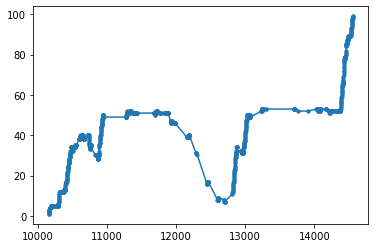

In [138]:
spk_beh_df=spk_beh_df_all.loc[ani,sess]
spk_beh_df=spk_beh_df.loc[spk_beh_df['task_index']==0]

spk_beh_df.query('trial==6&directed_locomotion')['lin_binned'].plot(marker='o',ms=3)

In [144]:
spk_beh_df['pause_event']

11       False
12       False
13       False
14       False
15       False
         ...  
61018    False
61019    False
61020    False
61021    False
61022    False
Name: pause_event, Length: 61012, dtype: object

In [157]:
ma = (spk_beh_df['trial']==6) &\
    (np.logical_not(spk_beh_df['directed_locomotion']) ) &\
    (np.logical_not(spk_beh_df['pause_event']) ) &\
    (np.logical_not(spk_beh_df['low_speed']) )


In [164]:
spk_beh_df.loc[spk_beh_df['trial']==6]

,1,2,3,4,5,6,7,8,9,10,...,dist_to_maze,off_track,on_track,off_track_event,pause_event,directed_locomotion,low_speed,lin_binned,direction,v_raw
10153,2,0,1,1,0,2,2,2,2,1,...,0.129028,False,True,False,False,True,False,1,1.0,NaN
10154,1,3,2,0,3,0,0,2,1,0,...,0.563299,False,True,False,False,True,False,1,1.0,NaN
10155,0,2,1,1,1,3,1,1,1,0,...,0.258031,False,True,False,False,True,False,1,1.0,NaN
10156,1,1,1,0,1,3,2,1,2,0,...,0.230990,False,True,False,False,True,False,1,1.0,NaN
10157,0,2,1,0,1,0,2,2,0,1,...,0.256770,False,True,False,False,True,False,2,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14554,2,2,2,1,2,2,1,0,2,0,...,0.232876,False,True,False,False,True,False,98,0.0,NaN
14555,0,3,1,5,2,2,1,2,1,2,...,0.229776,False,True,False,False,True,False,98,0.0,NaN
14556,2,1,2,3,4,2,1,3,3,0,...,0.541141,False,True,False,False,True,False,99,0.0,NaN
14557,2,2,1,0,2,2,2,2,3,0,...,0.646675,False,True,False,False,True,False,99,0.0,NaN


In [232]:
func = lambda x:x.groupby(['task_index','trial']).apply(lambda x:(x['v_gauss']<-3).mean())
frac_reverse=spk_beh_df_all.groupby(level=(0,1)).apply(func)


In [339]:
frac_reverse.loc[slice(None),slice(None),0].sort_values(ascending=False).head(60)

ii=17
row=frac_reverse.loc[slice(None),slice(None),0].sort_values(ascending=False)
ani,sess,trial_index=row.index[ii]

/tmp/ipykernel_377743/3926085924.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  spk_beh_df_all.loc[ani,sess].query('task_index==0&trial==@trial_ind')['lin'].plot()


<Axes: >

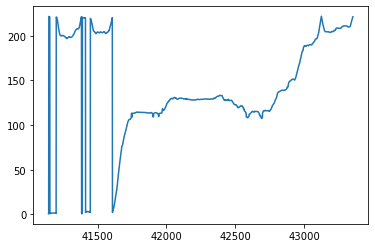

In [340]:

# sess='e16_3m2_211213'
# ani='_'.join(sess.split('_')[:2])
# trial_ind = 18
spk_beh_df_all.loc[ani,sess].query('task_index==0&trial==@trial_ind')['lin'].plot()

/tmp/ipykernel_377743/2381417663.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  chdf=changes_df_all.loc[(ani,sess,0),:]


<Axes: >

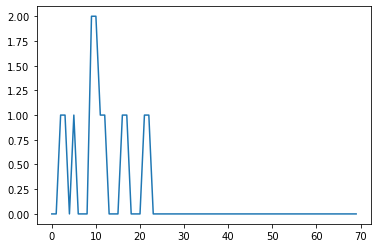

In [341]:
chdf=changes_df_all.loc[(ani,sess,0),:]
(chdf==1).sum(axis=0).plot()

In [228]:
spk_beh_df.groupby(['task_index','trial']).apply(lambda x:(x['v_gauss']<-3).mean())

task_index  trial
0           0.0      0.085943
            1.0      0.018537
            2.0      0.038267
            3.0      0.066084
            4.0      0.036345
            5.0      0.184483
            6.0      0.128007
            7.0      0.022112
            8.0      0.080756
            9.0      0.011494
            10.0     0.082019
            11.0     0.078710
            12.0     0.073653
            13.0     0.008568
            14.0     0.034731
            15.0     0.019393
            16.0     0.027088
            17.0     0.056452
            18.0     0.031700
            19.0     0.031557
            20.0     0.008672
            21.0     0.023866
            22.0     0.026685
            23.0     0.010549
            24.0     0.027468
            25.0     0.059727
            26.0     0.025277
            27.0     0.030321
            28.0     0.056152
            29.0     0.039695
            30.0     0.035019
dtype: float64

<Axes: >

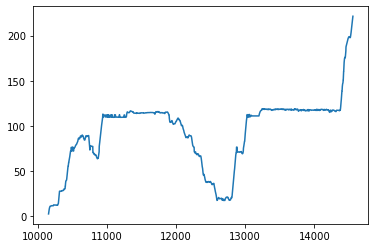

In [230]:
spk_beh_df.loc[spk_beh_df['trial']==6]['lin'].plot()

In [221]:
(spk_beh_df.loc[spk_beh_df['trial']==10]['v_gauss']<0).mean()

0.25118296529968454

In [165]:
spk_beh_df.loc[ma]['lin']

10563     80.171893
10564     80.343086
10565     80.685472
10566     81.113455
10567     81.370244
            ...    
13227    116.962701
13228    117.053877
13229    117.145054
13230    117.145054
13231    117.236231
Name: lin, Length: 692, dtype: float64

In [158]:
spk_beh_df.loc[ma]

,1,2,3,4,5,6,7,8,9,10,...,dist_to_maze,off_track,on_track,off_track_event,pause_event,directed_locomotion,low_speed,lin_binned,direction,v_raw
10563,2,2,0,2,2,1,2,1,3,1,...,0.210672,False,True,False,False,False,False,36,1.0,NaN
10564,1,2,1,3,4,3,0,1,1,2,...,0.213833,False,True,False,False,False,False,36,1.0,NaN
10565,0,1,1,1,1,3,1,0,1,2,...,0.512339,False,True,False,False,False,False,36,1.0,NaN
10566,0,3,1,2,3,0,0,0,2,2,...,0.502581,False,True,False,False,False,False,36,1.0,NaN
10567,1,2,1,1,3,1,4,1,3,2,...,0.436930,False,True,False,False,False,False,36,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13227,1,3,0,1,1,0,3,1,0,1,...,1.223928,False,False,True,False,False,False,52,0.0,NaN
13228,4,3,2,0,1,0,0,3,2,2,...,1.173502,False,False,True,False,False,False,52,0.0,NaN
13229,0,2,0,0,0,1,1,1,1,1,...,1.142744,False,False,True,False,False,False,52,0.0,NaN
13230,0,2,2,0,3,0,1,1,1,0,...,1.110709,False,False,True,False,False,False,52,0.0,NaN


In [150]:
spk_beh_df.query('trial==6& (~directed_locomotion)&~pause_event&~off_track_event&~low_speed')

,1,2,3,4,5,6,7,8,9,10,...,dist_to_maze,off_track,on_track,off_track_event,pause_event,directed_locomotion,low_speed,lin_binned,direction,v_raw
10153,2,0,1,1,0,2,2,2,2,1,...,0.129028,False,True,False,False,True,False,1,1.0,NaN
10154,1,3,2,0,3,0,0,2,1,0,...,0.563299,False,True,False,False,True,False,1,1.0,NaN
10155,0,2,1,1,1,3,1,1,1,0,...,0.258031,False,True,False,False,True,False,1,1.0,NaN
10156,1,1,1,0,1,3,2,1,2,0,...,0.230990,False,True,False,False,True,False,1,1.0,NaN
10157,0,2,1,0,1,0,2,2,0,1,...,0.256770,False,True,False,False,True,False,2,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14554,2,2,2,1,2,2,1,0,2,0,...,0.232876,False,True,False,False,True,False,98,0.0,NaN
14555,0,3,1,5,2,2,1,2,1,2,...,0.229776,False,True,False,False,True,False,98,0.0,NaN
14556,2,1,2,3,4,2,1,3,3,0,...,0.541141,False,True,False,False,True,False,99,0.0,NaN
14557,2,2,1,0,2,2,2,2,3,0,...,0.646675,False,True,False,False,True,False,99,0.0,NaN


In [85]:
pf_params_all = prepped_data_agg['pf_params_all']
all_fields_all = prepped_data_agg['all_fields_all']

In [87]:
pf_params = pf_params_all.loc[ani,sess,task_ind]
all_fields = all_fields_all.loc[ani,sess,task_ind]

/tmp/ipykernel_377743/156294482.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  pf_params = pf_params_all.loc[ani,sess,task_ind]
/tmp/ipykernel_377743/156294482.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_fields = all_fields_all.loc[ani,sess,task_ind]


In [90]:
changes_df=changes_df_all.loc[ani,sess,task_ind]

/tmp/ipykernel_377743/1687208755.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  changes_df=changes_df_all.loc[ani,sess,task_ind]


In [127]:
changes_df.loc[(changes_df.loc[:,13]==1)]

0    1    2    3    4    5   6    7    8    9   ...  60  61  62  \
1.0  101 1  0.0  NaN  NaN  0.0  NaN  NaN NaN  NaN  0.0  NaN  ... NaN NaN NaN   
     112 0  0.0  NaN  NaN  0.0  NaN  NaN NaN  NaN  0.0  NaN  ... NaN NaN NaN   
     162 2  0.0  NaN  NaN  0.0  NaN  NaN NaN  NaN  0.0  NaN  ... NaN NaN NaN   
     167 2  0.0  NaN  NaN  0.0  NaN  NaN NaN  NaN  0.0  NaN  ... NaN NaN NaN   
     169 0  0.0  NaN  NaN  0.0  NaN  NaN NaN  NaN  0.0  NaN  ... NaN NaN NaN   
     188 0  0.0  NaN  NaN  0.0  NaN  NaN NaN  NaN  0.0  NaN  ... NaN NaN NaN   
     194 0  0.0  NaN  NaN  0.0  NaN  NaN NaN  NaN  0.0  NaN  ... NaN NaN NaN   
     207 1  0.0  NaN  NaN  0.0  NaN  NaN NaN  NaN  0.0  NaN  ... NaN NaN NaN   
     280 1  0.0  NaN  NaN  0.0  NaN  NaN NaN  NaN  0.0  NaN  ... NaN NaN NaN   
     285 1  0.0  NaN  NaN  0.0  NaN  NaN NaN  NaN  0.0  NaN  ... NaN NaN NaN   
     291 0  0.0  NaN  NaN  0.0  NaN  NaN NaN  NaN  0.0  NaN  ... NaN NaN NaN   
     293 1  0.0  NaN  NaN  0.0  NaN  NaN NaN  NaN  0.0  NaN  ... NaN NaN NaN   
     297 0  0.0  NaN  NaN  0.0  NaN  NaN NaN  NaN  0.0  NaN  ... NaN NaN NaN   
both 137 0  0.0  0.0  0.0  0.0  0.0  0.0 NaN  0.0  0.0  0.0  ... NaN NaN NaN   
     140 0  0.0  0.0  0.0  0.0  0.0  0.0 NaN  0.0  0.0  0.0  ... NaN NaN NaN   
     294 1  0.0  0.0  0.0  0.0  0.0 -1.0 NaN  0.0  0.0  0.0  ... NaN NaN NaN   
     327 0  0.0  0.0  0.0  0.0  0.0  0.0 NaN  0.0  0.0  0.0  ... NaN NaN NaN   

            63  64  65  66  67  68  69  
1.0  101 1 NaN NaN NaN NaN NaN NaN NaN  
     112 0 NaN NaN NaN NaN NaN NaN NaN  
     162 2 NaN NaN NaN NaN NaN NaN NaN  
     167 2 NaN NaN NaN NaN NaN NaN NaN  
     169 0 NaN NaN NaN NaN NaN NaN NaN  
     188 0 NaN NaN NaN NaN NaN NaN NaN  
     194 0 NaN NaN NaN NaN NaN NaN NaN  
     207 1 NaN NaN NaN NaN NaN NaN NaN  
     280 1 NaN NaN NaN NaN NaN NaN NaN  
     285 1 NaN NaN NaN NaN NaN NaN NaN  
     291 0 NaN NaN NaN NaN NaN NaN NaN  
     293 1 NaN NaN NaN NaN NaN NaN NaN  
     297 0 NaN NaN NaN NaN NaN NaN NaN  
both 137 0 NaN NaN NaN NaN NaN NaN NaN  
     140 0 NaN NaN NaN NaN NaN NaN NaN  
     294 1 NaN NaN NaN NaN NaN NaN NaN  
     327 0 NaN NaN NaN NaN NaN NaN NaN  

[17 rows x 70 columns]

In [100]:
trial_index_to_index_within_df_all[ani,sess].loc[task_ind]

tt_ind  trial_ind
0.0     1.0           0
        2.0           1
        4.0           2
        5.0           3
        7.0           4
        9.0           5
        10.0          6
        12.0          7
        15.0          8
        16.0          9
        18.0         10
        20.0         11
        22.0         12
        23.0         13
        25.0         14
        27.0         15
        28.0         16
        29.0         17
        30.0         18
1.0     0.0           0
        3.0           1
        8.0           3
        13.0          5
        14.0          6
        17.0          7
        19.0          8
        21.0          9
        24.0         10
        26.0         11
Name: index, dtype: int64

In [101]:
reload(dpp)
dpp.trial_index_to_index_within_trialtype(spk_beh_df,mask_bad_trial=False)

   tt_ind  trial_ind
0  0.0     1.0           0
           2.0           1
           4.0           2
           5.0           3
           7.0           4
           9.0           5
           10.0          6
           12.0          7
           15.0          8
           16.0          9
           18.0         10
           20.0         11
           22.0         12
           23.0         13
           25.0         14
           27.0         15
           28.0         16
           29.0         17
           30.0         18
   1.0     0.0           0
           3.0           1
           6.0           2
           8.0           3
           11.0          4
           13.0          5
           14.0          6
           17.0          7
           19.0          8
           21.0          9
           24.0         10
           26.0         11
Name: index, dtype: int64

<Axes: >

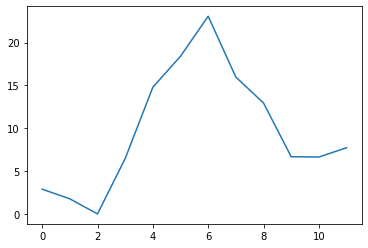

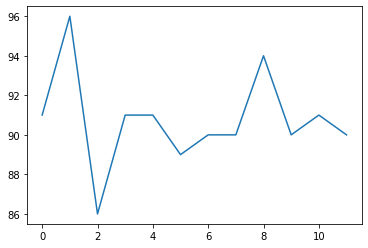

In [131]:
ti=1
uid,field_id= 162,2

pf_params.loc[(ti,'fr_peak',uid,field_id),:].plot()
plt.figure()
pf_params.loc[(ti,'peak',uid,field_id),:].plot()

In [ ]:
pca.combine_pf_res(pf_params,all_fields,beh_df=None,task_l=None,corners_df=None,index_within_to_trial_index_df=None,**kwargs)



In [84]:
fr_map_trial_df_all.loc[ani,sess]

/tmp/ipykernel_377743/3636998805.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  fr_map_trial_df_all.loc[ani,sess]


0         1         2         3         4         5   \
0 0.0 45.0  0   8.707048  3.550489  2.551667  0.377791  1.375759  0.485878   
            1   7.802008  3.794479  2.548977  0.505255  1.401224  0.601816   
            2   6.565567  4.043315  2.602261  0.677636  1.432956  0.749291   
            3   5.481301  4.164344  2.742432  0.840106  1.446152  0.872688   
            4   4.689904  4.166446  2.976220  0.980756  1.430058  0.959263   
...                  ...       ...       ...       ...       ...       ...   
1 1.0 343.0 71  0.000000  0.000000  1.946976  0.000000  0.000000  1.603556   
            72  0.000000  0.000000  1.689441  0.000000  0.000000  1.476512   
            73  0.000000  0.000000  1.290133  0.000000  0.000000  1.281406   
            74  0.000000  0.000000  0.864804  0.000000  0.000000  1.061402   
            75  0.000000  0.000000  0.587983  0.000000  0.000000  0.901628   

                      6         7         8         9   ...  27  28  29  30  \
0 0.0 45.0  0   1.146168  0.187210  4.470595  0.578064  ... NaN NaN NaN NaN   
            1   1.318619  0.344808  4.139848  0.720066  ... NaN NaN NaN NaN   
            2   1.551960  0.653344  3.570460  0.878102  ... NaN NaN NaN NaN   
            3   1.671105  1.078461  2.909519  0.997759  ... NaN NaN NaN NaN   
            4   1.552077  1.528486  2.286191  1.084942  ... NaN NaN NaN NaN   
...                  ...       ...       ...       ...  ...  ..  ..  ..  ..   
1 1.0 343.0 71  0.000000  0.000000  0.000000  0.000000  ... NaN NaN NaN NaN   
            72  0.000000  0.000000  0.000000  0.000000  ... NaN NaN NaN NaN   
            73  0.000000  0.000000  0.000000  0.000000  ... NaN NaN NaN NaN   
            74  0.000000  0.000000  0.000000  0.000000  ... NaN NaN NaN NaN   
            75  0.000000  0.000000  0.000000  0.000000  ... NaN NaN NaN NaN   

                31  32  33  34  35  36  
0 0.0 45.0  0  NaN NaN NaN NaN NaN NaN  
            1  NaN NaN NaN NaN NaN NaN  
            2  NaN NaN NaN NaN NaN NaN  
            3  NaN NaN NaN NaN NaN NaN  
            4  NaN NaN NaN NaN NaN NaN  
...             ..  ..  ..  ..  ..  ..  
1 1.0 343.0 71 NaN NaN NaN NaN NaN NaN  
            72 NaN NaN NaN NaN NaN NaN  
            73 NaN NaN NaN NaN NaN NaN  
            74 NaN NaN NaN NaN NaN NaN  
            75 NaN NaN NaN NaN NaN NaN  

[100800 rows x 37 columns]

<Axes: >

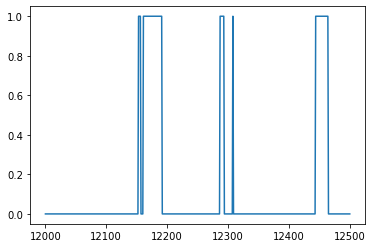

In [83]:
spk_beh_df['directed_locomotion'].loc[12000:12500].astype(float).plot()

In [20]:
import copy
beh_df = copy.copy(spk_beh_df)

In [25]:
kwargs_ = {'n_lin':200,'speed_key':'speed_gauss','speed_thresh':10,'key_post_fix':'gauss','dist_to_corner_thresh':5}

corners_d,xy_sampled_d,segment_d=dpp.find_tmaze_turns(beh_df,n_lin=kwargs_['n_lin'],speed_key=kwargs_['speed_key'],speed_thresh=kwargs_['speed_thresh'])
v_dir_d = dpp.get_v_direction(corners_d,thresh = 5.) # within thresh, considered no change
gpb = beh_df.groupby('trial_type')
post_fix_key = kwargs_['key_post_fix']
vx_key = f'vx_{post_fix_key}'
vy_key = f'vy_{post_fix_key}'
v_key = f'v_{post_fix_key}'
speed_key = kwargs_['speed_key']


for tt, val in gpb:
    v_dir = v_dir_d[tt]
    val_xy_to_sample_dist = scipy.spatial.distance.cdist(val[['x','y']].values,xy_sampled_d[tt])
    inds = np.argmin(val_xy_to_sample_dist,axis=1)
    seg_l = segment_d[tt][inds]
    x_sign_l = v_dir.loc[seg_l,'x_sign'].values
    y_sign_l = v_dir.loc[seg_l,'y_sign'].values
    x_coord_l = corners_d[tt].loc[seg_l,'x'].values
    y_coord_l = corners_d[tt].loc[seg_l,'y'].values
    v_aligned = val[vx_key] * x_sign_l + val[vy_key] * y_sign_l # assuming sign: one +-1, the other 0
    # v_off = val['vx_kalman'] * (x_sign_l==0) + val['vy_kalman'] * (y_sign_l==0) # assuming sign: one +-1, the other 0


    # deal with close to corner cases
    dist_to_corners = scipy.spatial.distance.cdist(val[['x','y']].values,corners_d[tt].loc[0:3,['x','y']])
    dist_to_corners_argmin = np.argmin(dist_to_corners,axis=1)
    dist_to_corners_min = np.min(dist_to_corners,axis=1)
    dist_to_corner_thresh = 5
    close_to_corner = dist_to_corners_min < dist_to_corner_thresh

    seg_l_prev = (dist_to_corners_argmin - 1) % 4
    seg_l_next = (dist_to_corners_argmin) % 4
    # pdb.set_trace()
    x_sign_l_prev = v_dir.loc[seg_l_prev,'x_sign'].values
    y_sign_l_prev = v_dir.loc[seg_l_prev,'y_sign'].values
    v_aligned_prev = val[vx_key] * x_sign_l_prev + val[vy_key] * y_sign_l_prev

    x_sign_l_next = v_dir.loc[seg_l_next,'x_sign'].values
    y_sign_l_next = v_dir.loc[seg_l_next,'y_sign'].values
    v_aligned_next = val[vx_key] * x_sign_l_next + val[vy_key] * y_sign_l_next
    aligned_close_to_corner = ((np.sign(v_aligned_prev) + np.sign(v_aligned_next)) >= 0).astype(int) # lenient: if one direction is positive, count as positive
    aligned_close_to_corner = 2*(aligned_close_to_corner - 1/2)
    aligned_close_to_corner = aligned_close_to_corner[close_to_corner]


    aligned = np.sign(v_aligned)
    aligned[close_to_corner] = aligned_close_to_corner
    v_kalman = val[speed_key] * aligned
    # distance off the track
    # coord_off = (val['x']-x_coord_l) * (x_sign_l==0) + (val['y']-y_coord_l) * (y_sign_l==0) # select x/y as where x/y_sign==0 as the baseline coordinate to compute deviation 

    beh_df.loc[val.index,'segment'] = seg_l
    beh_df.loc[val.index,v_key] = v_kalman
    # beh_df.loc[val.index,'v_kalman_aligned'] = v_aligned
    # beh_df.loc[val.index,'v_kalman_off'] = v_off
    # beh_df.loc[val.index,'coord_off'] = coord_off

In [63]:
np.nonzero(val.index==12000)[0]

array([5278])

In [64]:
inds[5278]

93

In [70]:
val.loc[12200]

1                          1
2                          1
3                          0
4                          0
5                          0
                       ...  
directed_locomotion    False
low_speed               True
lin_binned                40
direction                0.0
v_raw                    NaN
Name: 12200, Length: 514, dtype: object

<Axes: >

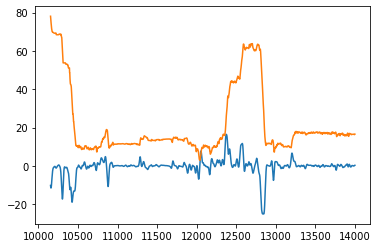

In [52]:
beh_df['vx_gauss'].loc[10153:14000].plot()
beh_df['x'].loc[10153:14000].plot()

In [55]:
v_dir

,lin_st,lin_end,x_sign,y_sign
0,1.507546,72.363166,-1.0,0.0
1,72.363166,110.005214,0.0,-1.0
2,110.005214,186.396429,1.0,0.0
3,186.396429,221.824239,0.0,1.0


In [53]:
x_sign_l

array([-1., -1., -1., ...,  0.,  0.,  0.])

<Axes: >

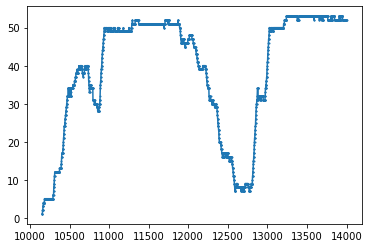

In [75]:
beh_df['lin_binned'].loc[10153:14000].plot(marker='o',ms=1)

In [41]:
beh_df['segment'].loc[12000:12500]

12000    1.0
12001    1.0
12002    1.0
12003    1.0
12004    1.0
        ... 
12496    0.0
12497    0.0
12498    0.0
12499    0.0
12500    0.0
Name: segment, Length: 501, dtype: float64

In [31]:
(beh_df[v_key]<0).loc[10000:14000]

10000    False
10001    False
10002    False
10003    False
10004    False
         ...  
13996    False
13997    False
13998    False
13999    False
14000    False
Name: v_gauss, Length: 4001, dtype: bool

In [16]:
(spk_beh_df['v_gauss'] < 0).sum()

13650

<Axes: >

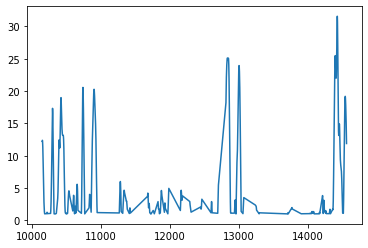

In [13]:
spk_beh_df.query('trial==6&directed_locomotion')['v_gauss'].plot()

<Axes: >

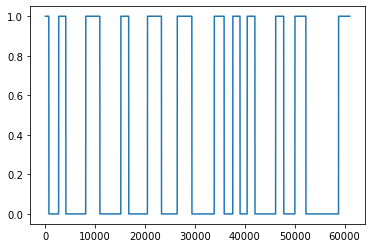

In [11]:
spk_beh_df['direction'].plot()